# Stack Overflow Analysis Part 2

## Introduction 

In the second part of this project, I have chosen to create and analyze time series of creation dates of Stack Overflow questions to find two most similar users and two most dissimilar users. I have also worked on the following hypothesis.

Hypothesis: Question activity peaks during holidays i.e. summer months (June to August) and winter months (December and January). I am analyzing monthly time series of creation dates of Stack Overflow questions and comparing question counts for top 100 users. My hypothesis states that user activity represented by question counts is higher during holidays i.e. summer months (June to August) and winter months (December and January). This is based on the assumption that Stack Overflow users are mostly students who have more free time during holidays relative to rest of the school year and start new projects / tutorials / internships during those months. 

I have resampled the data monthly and have applied euclidean distance to the generated timeseries'. I use euclidean distance as it is the most popular distance function when comparing quantitative data.

In [2]:
import pandas as pd
import sklearn.metrics.pairwise as metrics
from numpy import unravel_index
from numpy import argmax
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('stackoverflow_dataframe.csv')
df_ques = df[(df['Type']=='Q')&~(df['OwnerUserId'].isnull())]
df_ques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518833 entries, 3 to 5751160
Data columns (total 8 columns):
Id              float64
CreationDate    object
OwnerUserId     float64
ParentId        float64
Tag             object
ViewCount       float64
Score           float64
Type            object
dtypes: float64(5), object(3)
memory usage: 173.0+ MB


In [4]:
df_ques['Count'] = df_ques.groupby('OwnerUserId')['OwnerUserId'].transform('count')
df_top_users = df_ques[['OwnerUserId', 'Count']].drop_duplicates().sort_values('Count', ascending=False).reset_index(drop=True)
df_top_100_users = df_top_users[:100]
df_top_100_users.info()

c:\users\yash\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
OwnerUserId    100 non-null float64
Count          100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df_ques = df_ques[df_ques['OwnerUserId'].isin(df_top_100_users['OwnerUserId'])][['CreationDate', 'OwnerUserId']]
df_ques['CreationDate'] = pd.to_datetime(df_ques['CreationDate'],infer_datetime_format=True)
df_ques.head()

,CreationDate,OwnerUserId
19,2015-01-01 00:05:03.773,875317.0
155,2015-01-01 00:49:12.937,409976.0
582,2015-01-01 03:41:14.750,2879704.0
685,2015-01-01 04:26:23.437,409976.0
716,2015-01-01 04:37:40.790,40106.0


In [6]:
TimeSeries =  pd.DataFrame()
TimeSeriesList = []
def createTimeSeries(userid):
    data = df_ques[df_ques['OwnerUserId'] == userid]
    global TimeSeries
    global TimeSeriesList
    series = data.resample('M', on='CreationDate', label='right')['OwnerUserId'].count().rename(str(userid))
    TimeSeries = pd.concat([TimeSeries, series],axis=1)
    TimeSeries = TimeSeries.fillna(0)
    TimeSeriesList.append(TimeSeries[str(userid)].values.tolist())
    #TimeSeriesDict[userid] = TimeSeries[str(userid)].values.tolist()
    


In [7]:
df_top_100_users['OwnerUserId'].apply(createTimeSeries)
TimeSeries = TimeSeries.fillna(0)
index_list = TimeSeries.index.tolist()
#print(index_list)
TimeSeries

,875317.0,2786156.0,1194415.0,651174.0,1833945.0,1223975.0,4381665.0,4009451.0,2674303.0,784597.0,...,3102968.0,4499505.0,3736648.0,3595549.0,122536.0,264052.0,40106.0,1197249.0,4968722.0,651887.0
CreationDate,,,,,,,,,,,,,,,,,,,,,
2015-01-31,37,44,42,40,24,22,12,30,26,34,...,7,6,26,0.0,20,15,12,1,0.0,0.0
2015-02-28,16,30,34,35,39,21,36,7,30,14,...,7,2,21,5.0,34,23,5,15,0.0,1.0
2015-03-31,37,7,46,40,25,21,31,19,15,20,...,2,3,16,8.0,32,9,27,39,0.0,12.0
2015-04-30,34,28,39,25,36,27,37,17,27,9,...,0,27,5,11.0,16,16,14,15,0.0,15.0
2015-05-31,22,48,23,38,24,31,25,21,19,15,...,49,42,20,5.0,11,9,14,15,0.0,12.0
2015-06-30,50,38,14,21,26,47,22,46,22,18,...,14,40,23,31.0,1,4,6,6,17.0,13.0
2015-07-31,49,31,20,35,20,37,32,29,22,17,...,15,18,16,19.0,1,10,17,12,30.0,15.0
2015-08-31,44,32,40,24,30,39,28,30,30,12,...,5,11,13,24.0,5,2,6,31,28.0,27.0
2015-09-30,49,25,39,25,24,17,36,47,28,15,...,24,5,9,26.0,2,10,13,6,16.0,5.0


In [8]:

euclidean_dists = metrics.euclidean_distances(TimeSeriesList)
print('Similarity between the top 100 users:')
print(euclidean_dists)

Similarity between the top 100 users:
[[   0.           69.34695379   68.81133628 ...,  108.56795107
    98.07140256  105.33280591]
 [  69.34695379    0.           58.83876273 ...,   88.81441324
    81.09870529   80.73413157]
 [  68.81133628   58.83876273    0.         ...,   69.89992847
    89.13472948   84.36824047]
 ..., 
 [ 108.56795107   88.81441324   69.89992847 ...,    0.           62.87288764
    50.81338406]
 [  98.07140256   81.09870529   89.13472948 ...,   62.87288764    0.
    41.74925149]
 [ 105.33280591   80.73413157   84.36824047 ...,   50.81338406
    41.74925149    0.        ]]



Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

The two most disimilar users are 1 and 75


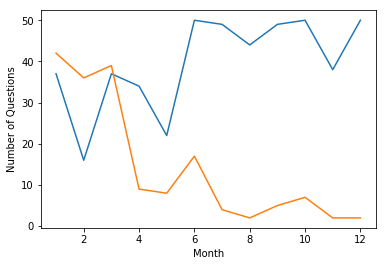

In [9]:
i,j = unravel_index(argmax(euclidean_dists),euclidean_dists.shape)
index = [1,2,3,4,5,6,7,8,9,10,11,12]
print('The two most disimilar users are {} and {}'.format(i+1,j+1))
plt.plot(index,TimeSeriesList[i] )
plt.plot(index,TimeSeriesList[j] )
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.show()

The two most similar users are 56 and 72


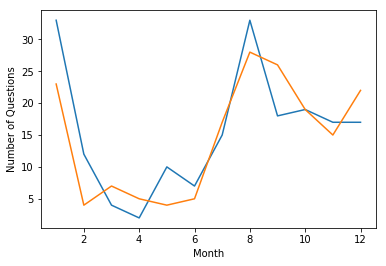

In [10]:
min_dist = euclidean_dists[0][1]
for x in range(100):
    for y in range(100):
        if x != y:
            if euclidean_dists[x][y] < min_dist:
                min_dist = euclidean_dists[x][y]
                index_user1 = x
                index_user2 = y

print('The two most similar users are {} and {}'.format(index_user1+1,index_user2+1))
plt.plot(index,TimeSeriesList[index_user1])
plt.plot(index,TimeSeriesList[index_user2])
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.show()

Looking at the plot for two most similar users, we can see that the question count visibly peaks at three points, beginning January, June, July, August, December.
From the curve for two most dissimilar user, we can infer that the user with a higher count is over 15 counts throughout the year,with the highest count being achieved in June, July and December.
Both curves together can be used to conclude that question user activity peaks during holiday months, confirming my hypothesis that user activity increases during holidays.

-----------------

In [14]:
cosine_dists = metrics.cosine_distances(TimeSeriesList)
print('Similarity between the top 100 users:')
print(cosine_dists)

Similarity between the top 100 users:
[[ 0.          0.12189039  0.11844521 ...,  0.28720938  0.19130045
   0.2503682 ]
 [ 0.12189039  0.          0.13813158 ...,  0.37805206  0.29343692
   0.27776773]
 [ 0.11844521  0.13813158  0.         ...,  0.165515    0.4012663
   0.33639895]
 ..., 
 [ 0.28720938  0.37805206  0.165515   ...,  0.          0.51458754
   0.36310171]
 [ 0.19130045  0.29343692  0.4012663  ...,  0.51458754  0.          0.2231084 ]
 [ 0.2503682   0.27776773  0.33639895 ...,  0.36310171  0.2231084   0.        ]]


The two most disimilar users are 1 and 75


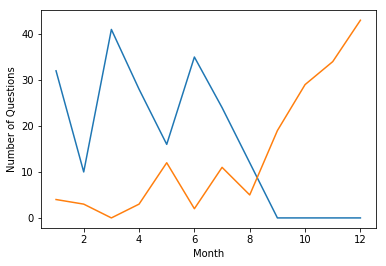

In [15]:
m,n = unravel_index(argmax(cosine_dists),cosine_dists.shape)
index = [1,2,3,4,5,6,7,8,9,10,11,12]
print('The two most disimilar users are {} and {}'.format(i+1,j+1))
plt.plot(index,TimeSeriesList[m])
plt.plot(index,TimeSeriesList[n])
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.show()

The two most similar users are 5 and 26


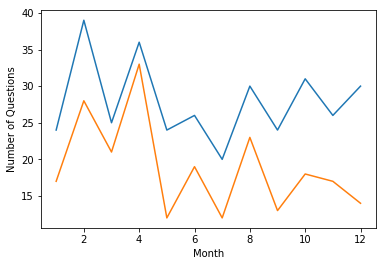

In [16]:
min_dist = cosine_dists[0][1]
for x in range(100):
    for y in range(100):
        if x != y:
            if cosine_dists[x][y] < min_dist:
                min_dist = cosine_dists[x][y]
                index_user1 = x
                index_user2 = y

print('The two most similar users are {} and {}'.format(index_user1+1,index_user2+1))
plt.plot(index,TimeSeriesList[index_user1])
plt.plot(index,TimeSeriesList[index_user2])
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.show()

As I have monthly data of question counts, I am using Euclidean and Cosine metric to find distance between top users. Cosine provides an accurate measure of similarity/dissimarity by analyzing the angle between two vectors. To complement the similarity/dissimilarity analysis, I used Euclidean metric as it focuses on magnitude of the difference between two objects. Both metric reflect the similarity with different aspect and together, will complement my analysis.

Euclidean distance gave me the expected results. This is because here my data is quantitative and I am interested in the magnitude difference of values, hence euclidean distance gives me more accurate reults. 

# Conclusion

The methods used here are reliable and give a good sense of the data but this doesn't mean that are analysis is 100% accurate. Since the output is positive, this calls for further analysis on similar lines.